# Random walk

- How do you know time series problem is predictable?
- There is a tool called a random walk that can help you understand the predictability of your time series forecast problem.

# 1. Random series

In [1]:
from random import seed
from random import randrange
from matplotlib import pyplot
%matplotlib inline

In [2]:
seed(1)

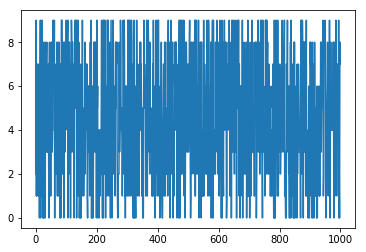

In [3]:
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)

# 2. Random Walk

- random walk는 random series가 아니다.

### Random Walk

1. Start with a random number of either -1 or 1.

2. Randomly select a -1 or 1 and add it to the observation from the previous time step.

3. Repeat step 2 as long as you like

In [4]:
from random import seed
from random import random
from matplotlib import pyplot

seed(1)

random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)

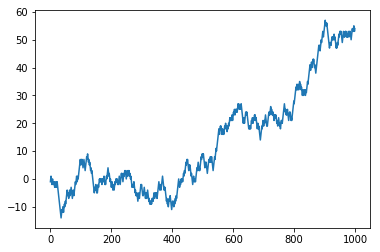

In [6]:
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
pyplot.plot(random_walk)

# 3. Random Walk and Autocorrelation

We can calculate the correlation between each observation and the observations at previous time steps. A plot of these correlations is called an autocorrelation plot or a correlogram. 

Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  # This is added back by InteractiveShellApp.init_path()


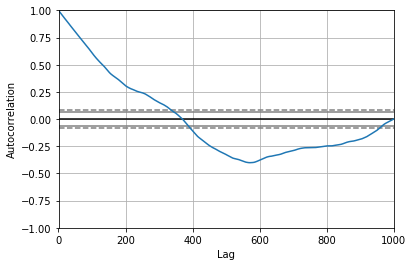

In [7]:
from pandas.tools.plotting import autocorrelation_plot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)

for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
autocorrelation_plot(random_walk)
pyplot.show()

# 4. Random Walk and Stationarity

- Random Walk is non stationary

1) mean 이 상수가 아니다.

2) variance 가 상수가 아니다.

    
    
- A review of the random walk line plot might suggest this to be case. We can confirm this using a statistical significance test, specifically the Augmented Dickey-Fuller Test

In [8]:
from random import seed 
from random import random
from statsmodels.tsa.stattools import adfuller

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)

In [9]:
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

In [11]:
# statistical test
result = adfuller(random_walk)
print("ADF Statistic: %f" % result[0])
print("P value: %f" % result[1])
print("Critical Values: ")

for key, value in result[4].items():
    print("\t%s: %.3f" %(key, value))

ADF Statistic: 0.341605
P value: 0.979175
Critical Values: 
	1%: -3.437
	5%: -2.864
	10%: -2.568


- p value가 높다.
- we can say that the time seires does appear to be non-stationary.

### 차분을 해보자.

In [12]:
from random import seed
from random import random
import matplotlib.pyplot as plt

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)

In [13]:
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

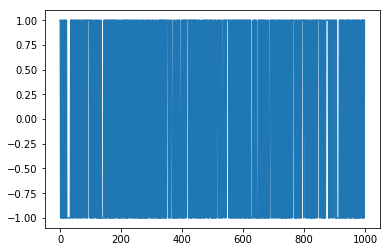

In [14]:
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
    
plt.plot(diff)

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


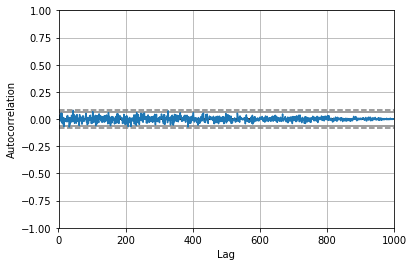

In [15]:
autocorrelation_plot(diff)

In [16]:
result = adfuller(diff)

print("ADF Statistic: %f" % result[0])
print("P value: %f" % result[1])
print("Critical Values: ")

for key, value in result[4].items():
    print("\t%s: %.3f" %(key, value))

ADF Statistic: -31.084824
P value: 0.000000
Critical Values: 
	1%: -3.437
	5%: -2.864
	10%: -2.568


# 5. Predicting a Random Walk

### 1. Persistence model

- random walk는 예측하지 못한다.

A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. This is often called the naive forecast, or a persistence model.

In [24]:
from random import seed
from random import random
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)

for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

In [25]:
#prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

In [26]:
#persitence

predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


### 2. Random model

In [27]:
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
from math import sqrt
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))

In [28]:
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


- Random walk는 Persistence Model이 가장 좋은 결과를 낳는다.